<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   6.Best CNN Model
</h1>

<h2 style="font-size: 18px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   6.1. Data Augmentation with Mobilenet_v2
</h2>

In [14]:
train_path = "./Fish_Dataset/Main_Fish_DataSet/Dataset/Train"
val_path = "./Fish_Dataset/Main_Fish_DataSet/Dataset/Validation"
test_path = "./Fish_Dataset/Main_Fish_DataSet/Dataset/Test"

In [16]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

train_batches = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)


valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input) \
    .flow_from_directory(
        directory=val_path,
        target_size=(224, 224),  
        color_mode='rgb',       
        batch_size=32,
        class_mode='categorical' 
    )


test_batches = ImageDataGenerator(preprocessing_function=preprocess_input) \
    .flow_from_directory(
        directory=test_path,
        target_size=(224, 224),  
        color_mode='rgb',       
        batch_size=32,
        shuffle=False,         
        class_mode='categorical' 
    )

Found 6300 images belonging to 9 classes.
Found 1350 images belonging to 9 classes.
Found 1350 images belonging to 9 classes.


<p style="font-size: 16px; color: black; text-align: left;">
    
I utilized ImageDataGenerator class to create batches of data from the training, validation, and test folders.

The ImageDataGenerator.flow_from_directory() method creates a DirectoryIterator, which produces batches of normalized tensor image data from the specified directories.

To enhance the model's performance and address overfitting issues, I augmented the training dataset with MobileNetV2.

Additionally, I set shuffle=False exclusively for the test batches. This ensures that I can access the unshuffled test labels later when plotting the evaluation results as a confusion matrix.

</p>

<h2 style="font-size: 18px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   6.2. Building CNN Model 
</h2>

In [18]:
model_DeepCNN2_v2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(224, 224, 3)), 
    
    #First Conv2D layer + LeakyReLU
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    #Second Conv2D layer + LeakyReLU
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    #Third Conv2D layer + LeakyReLU
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    #Fourth Conv2D layer + LeakyReLU
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    #Dense layer + LeakyReLU
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    
    #Second dense layer with LeakyReLU
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    
    tf.keras.layers.Dropout(0.2),
    
    #Third dense layer with LeakyReLU
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(9, activation='softmax')
])

model_DeepCNN2_v2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,509,577 (9.57 MB)

 Trainable params: 2,509,577 (9.57 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Add the ReduceLROnPlateau callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  
    factor=0.2,          
    patience=3,          
    min_lr=1e-6          #minimum learning rate
)


model_DeepCNN2_v2.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


history_model_DeepCNN2_v2_LR = model_DeepCNN2_v2.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=20,
    verbose=2,
    callbacks=[lr_scheduler]
)


Epoch 1/20
197/197 - 206s - 1s/step - accuracy: 0.3770 - loss: 1.6380 - val_accuracy: 0.6430 - val_loss: 0.9436 - learning_rate: 0.0010
Epoch 2/20
197/197 - 205s - 1s/step - accuracy: 0.6559 - loss: 0.8997 - val_accuracy: 0.7296 - val_loss: 0.7113 - learning_rate: 0.0010
Epoch 3/20
197/197 - 197s - 998ms/step - accuracy: 0.7879 - loss: 0.5800 - val_accuracy: 0.8844 - val_loss: 0.3044 - learning_rate: 0.0010
Epoch 4/20
197/197 - 201s - 1s/step - accuracy: 0.8487 - loss: 0.4168 - val_accuracy: 0.8985 - val_loss: 0.2284 - learning_rate: 0.0010
Epoch 5/20
197/197 - 192s - 977ms/step - accuracy: 0.8921 - loss: 0.2913 - val_accuracy: 0.9319 - val_loss: 0.1813 - learning_rate: 0.0010
Epoch 6/20
197/197 - 189s - 960ms/step - accuracy: 0.9037 - loss: 0.2693 - val_accuracy: 0.9570 - val_loss: 0.1109 - learning_rate: 0.0010
Epoch 7/20
197/197 - 189s - 961ms/step - accuracy: 0.9230 - loss: 0.2248 - val_accuracy: 0.9719 - val_loss: 0.0802 - learning_rate: 0.0010
Epoch 8/20
197/197 - 191s - 971ms/st

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   7.Comparison of Experimental Results
</h1>

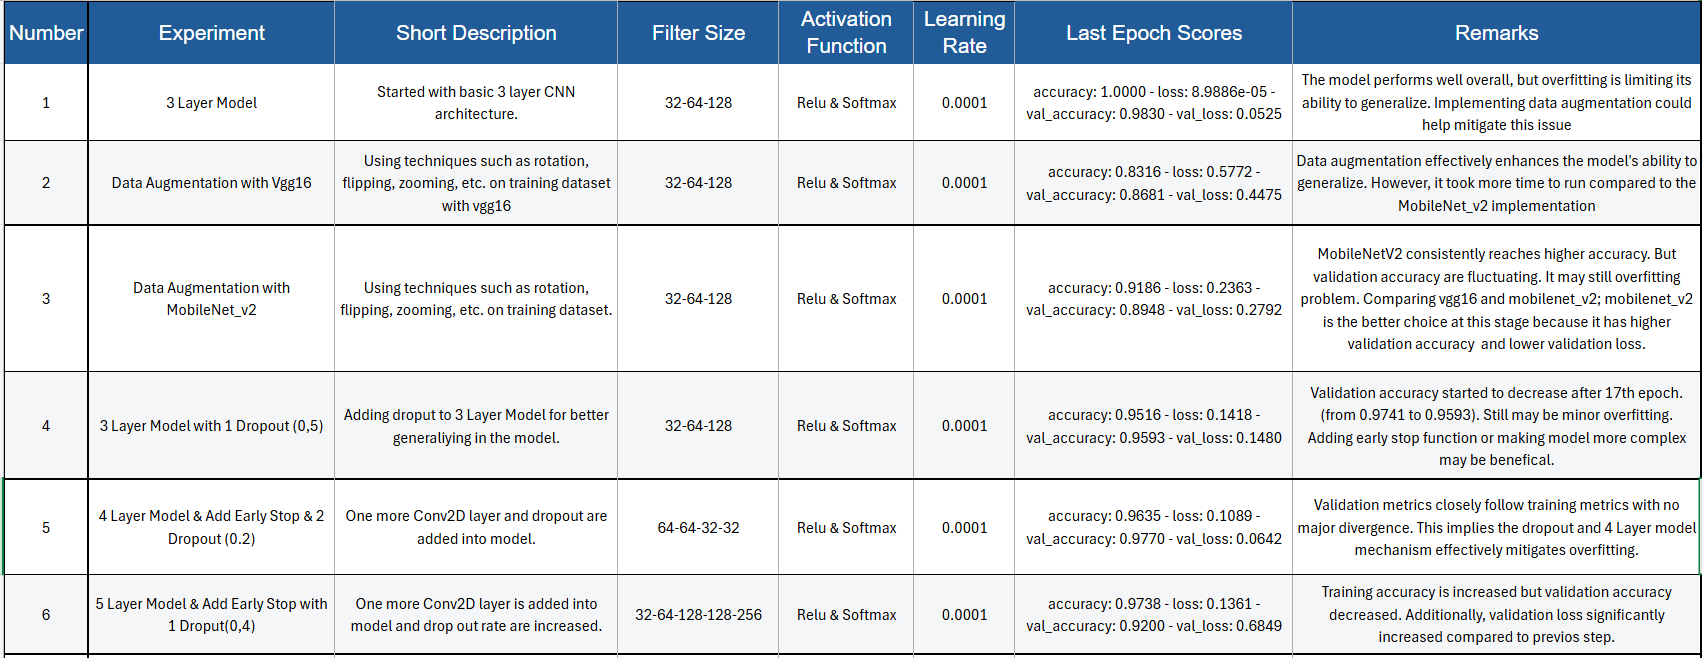

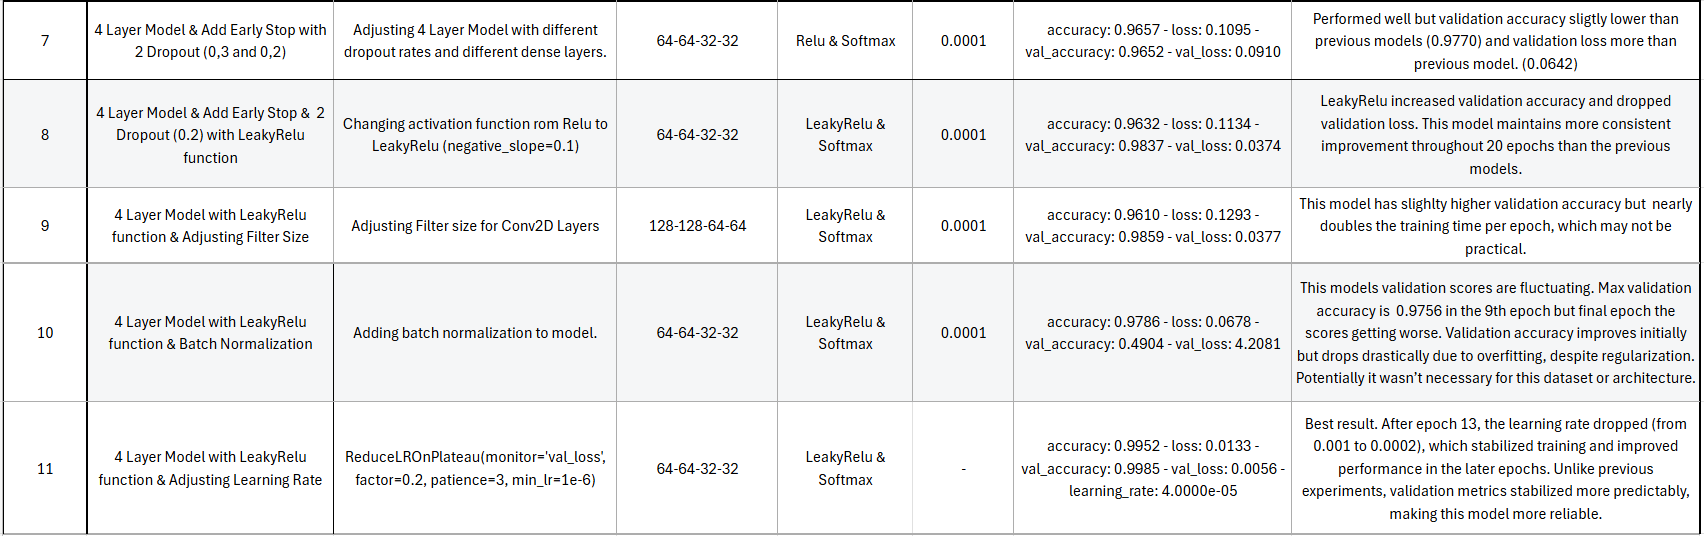

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   8.Model Assesment
</h1>
       

<h2 style="font-size: 18px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   8.1. Evaluation 
</h2>

In [31]:
loss, accuracy = model_DeepCNN2_v2.evaluate(test_batches, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - accuracy: 0.9742 - loss: 0.0744
Test Loss: 0.0445
Test Accuracy: 0.9852


In [33]:
from sklearn.metrics import classification_report, confusion_matrix


predictions = model_DeepCNN2_v2.predict(test_batches, verbose=1)
y_pred = np.argmax(predictions, axis=1)  
y_true = test_batches.classes  

report = classification_report(
    y_true, 
    y_pred, 
    target_names=list(test_batches.class_indices.keys())
)
print(report)


43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 272ms/step
                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       150
   Gilt-Head Bream       1.00      0.87      0.93       150
   Hourse Mackerel       1.00      1.00      1.00       150
        Red Mullet       1.00      1.00      1.00       150
     Red Sea Bream       0.88      1.00      0.94       150
          Sea Bass       1.00      1.00      1.00       150
            Shrimp       1.00      1.00      1.00       150
Striped Red Mullet       1.00      1.00      1.00       150
             Trout       1.00      1.00      1.00       150

          accuracy                           0.99      1350
         macro avg       0.99      0.99      0.99      1350
      weighted avg       0.99      0.99      0.99      1350



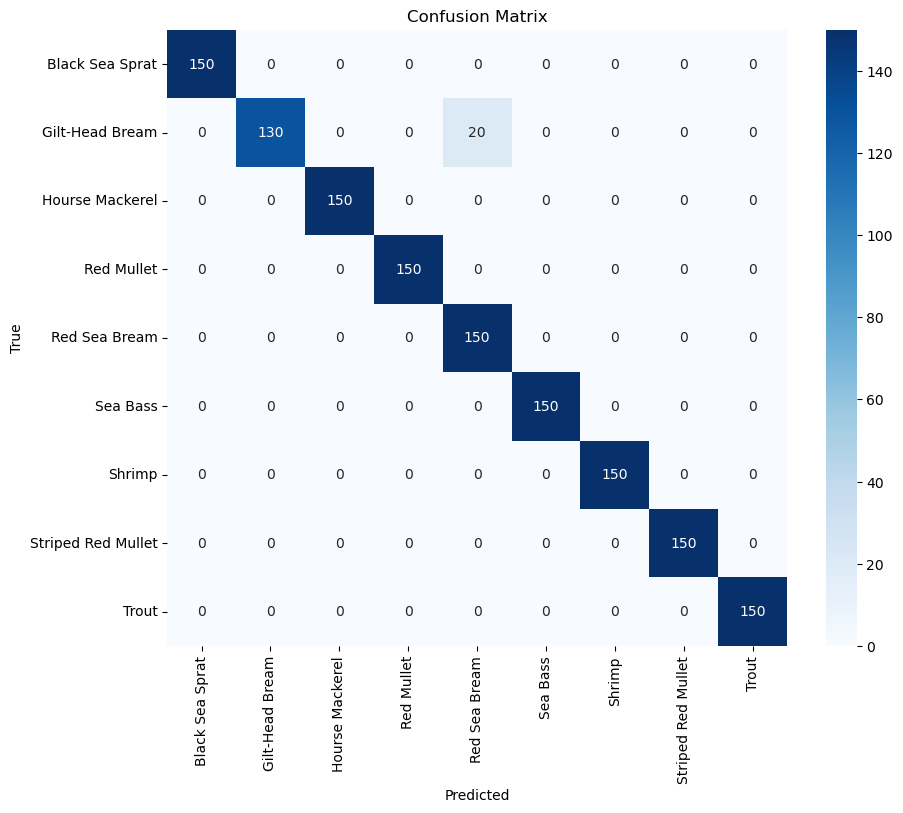

In [35]:
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_batches.class_indices.keys()),
            yticklabels=list(test_batches.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<p style="font-size: 16px; color: black; text-align: left;">
    
99% Accuracy on the test set is an excellent result.

Both macro and weighted averages for precision, recall, and F1-score are 0.99, confirming consistent performance across all categories.
Based on the confusion matrix there are minor issues in distinguishing Gilt-Head Bream and Red Sea Bream.

Gilt-Head Bream: 130 were correctly classified, and 20 were misclassified as "Red Sea Bream". Other categories have all 150 samples correctly classified.

The model may shows better differentiate performance if it has more samples for Gilt-Head Bream and Red Sea Bream.

</p>

<h2 style="font-size: 18px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   8.2. Examples of Misclassification 
</h2>

In [49]:
test_image_paths = test_batches.filepaths 


results_df = pd.DataFrame({
    'FilePath': test_image_paths,
    'TrueLabel': [list(test_batches.class_indices.keys())[i] for i in y_true],
    'PredictedLabel': [list(test_batches.class_indices.keys())[i] for i in y_pred]
})


results_df['Correct'] = results_df['TrueLabel'] == results_df['PredictedLabel']


correct_preds = results_df[results_df['Correct'] == True]
incorrect_preds = results_df[results_df['Correct'] == False]

print("Correct Predictions:")
print(correct_preds.head())
print("\nIncorrect Predictions:")
print(incorrect_preds.head())


Correct Predictions:
                                            FilePath        TrueLabel  \
0  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   
1  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   
2  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   
3  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   
4  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Black Sea Sprat   

    PredictedLabel  Correct  
0  Black Sea Sprat     True  
1  Black Sea Sprat     True  
2  Black Sea Sprat     True  
3  Black Sea Sprat     True  
4  Black Sea Sprat     True  

Incorrect Predictions:
                                              FilePath        TrueLabel  \
156  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Gilt-Head Bream   
157  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Gilt-Head Bream   
169  ./Fish_Dataset/Main_Fish_DataSet/Dataset/Test\...  Gilt-Head Bream   
199  ./Fish_Dataset/Main_Fish_DataSe

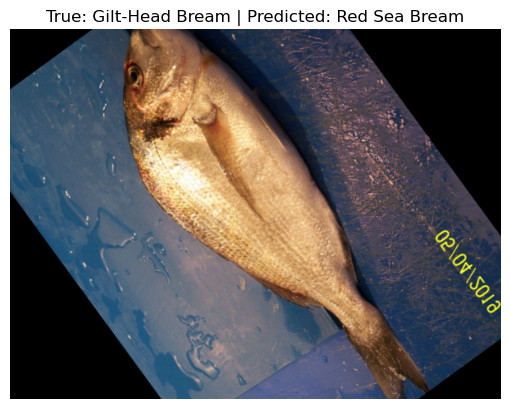

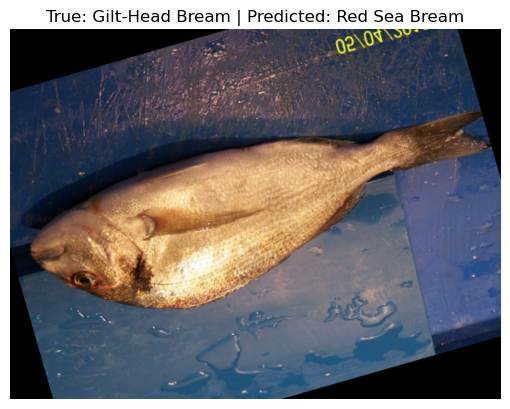

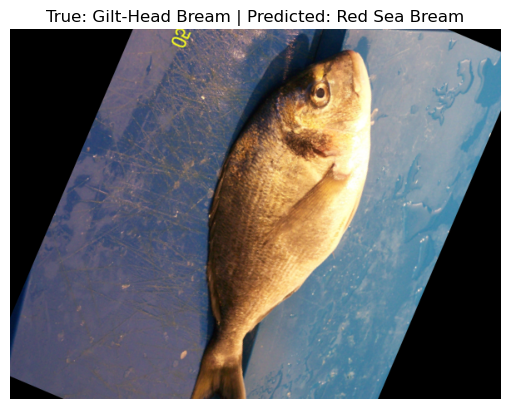

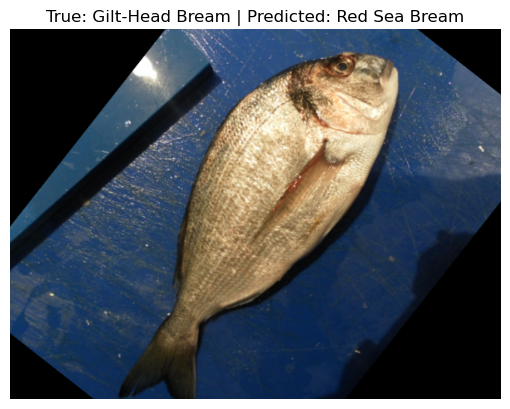

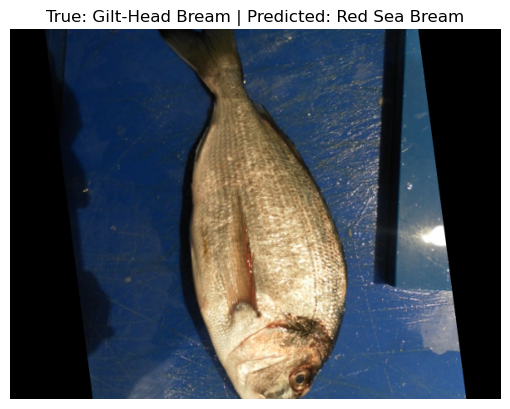

In [83]:
from PIL import Image

for idx, row in incorrect_preds.head(5).iterrows():  # Show first 5 incorrect images
    img = Image.open(row['FilePath'])
    plt.imshow(img)
    plt.title(f"True: {row['TrueLabel']} | Predicted: {row['PredictedLabel']}")
    plt.axis('off')
    plt.show()


<p style="font-size: 16px; color: black; text-align: left;">
    
I listed 5 example images of Gilt-Head Bream that is classified as Red Sea Bream.

</p>

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   9.Final Discussion
</h1>
    

<p style="font-size: 16px; color: black; text-align: left;">
    
This pipeline achieved strong performance with an accuracy of 0.9852.

Throughout the experiments, I used 20 epochs with early stopping to prevent overfitting.

I started a model, consisting of 3 basic layer and it struggled to generalize and showed signs of overfitting. To get rid of overfitting, I applied data augmentation techniques, modified the activation function, and adjusting dropout and additional Conv2D layers. **Using MobileNetV2** for data augmentation significantly improved performance compared to VGG16, offering both better accuracy and faster training times.


**Adding two dropout layers with a 0.2 rate** enhanced the model's stability and performance. 3-layer architecture was too simple, and a 5-layer model increased validation loss, a 4-layer structure worked better. I fine tuned the dropout placement and adjusted the dropout rates to achieve optimal results.

**Changing Activation Function** from ReLU to LeakyReLU improved model's validation accuracy and loss, particularly for this dataset, which included 9 classes and 9,000 images.


**Adjusting Learning Rate** in the final stages boosted model performance, making it reliable for the classification task. 

While the model performed well overall, it has room for improvement in distinguishing between Gilt-Head Bream and Red Sea Bream because of their visual similarity. Increasing the number of samples for these two categories might enhance accuracy for future iterations. For other categories, the model showed excellent classification capability.

</p>

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
   10. References
</h1>
    

O.Ulucan, D.Karakaya, and M.Turkan.(2020) A large-scale dataset for fish segmentation and classification.
In Conf. Innovations Intell. Syst. Appli. (ASYU)